In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline 

In [3]:
df_index=pd.read_csv("economic_index.csv")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
#drop unnecesserary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
#check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


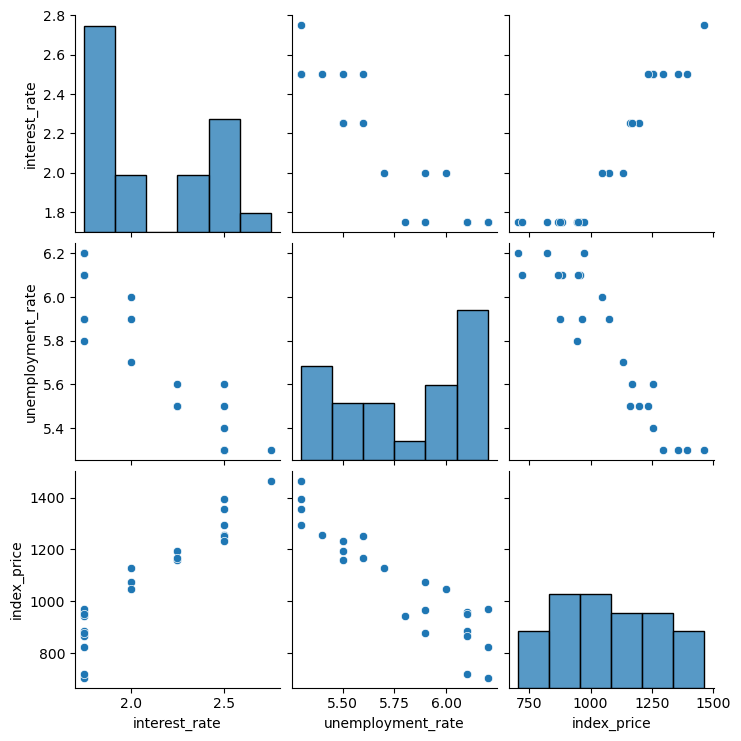

In [7]:
#lets do some vıualization
import seaborn as sns
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

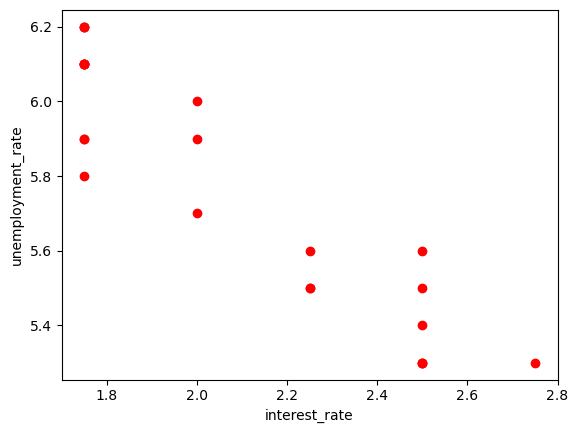

In [9]:
#visualiza the datapoints more closely
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color="r")
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")

In [10]:
#independent and dependent features
x=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [11]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

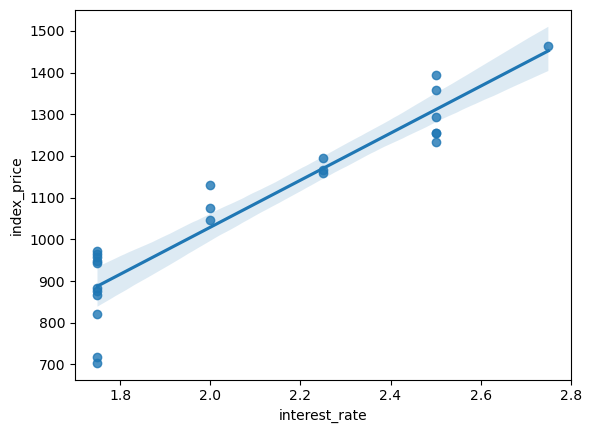

In [13]:
import seaborn as sns
sns.regplot(data=df_index, x="interest_rate", y="index_price")

In [14]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
X_test=scaler.fit_transform(x_test)

In [18]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [26]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=3)

In [27]:
np.mean(validation_score)

-5914.828180162388

In [28]:
#predictions

In [29]:
y_pred=regression.predict(X_test)

In [30]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [31]:
#performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [32]:
#assumptions

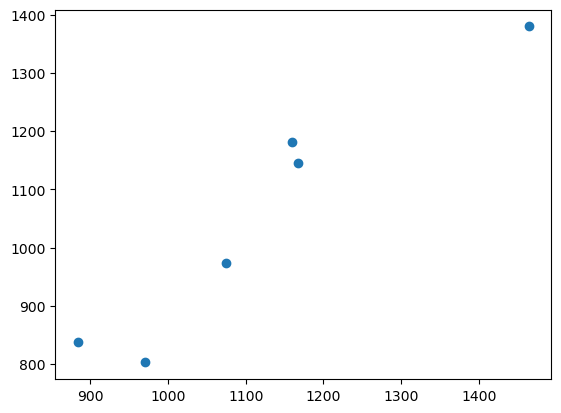

In [33]:
plt.scatter(y_test,y_pred)

In [34]:
residuals=y_test-y_pred
print(residuals)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


In [35]:
#plot this residuals

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


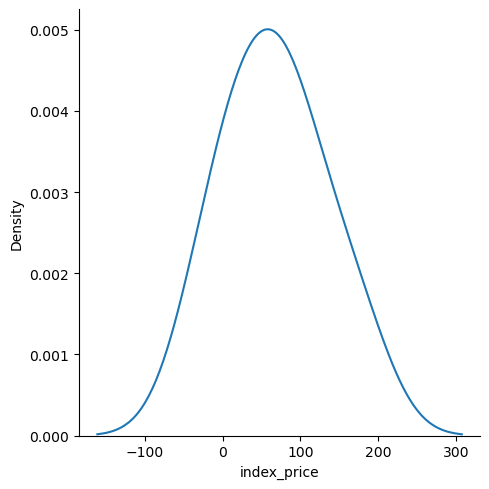

In [37]:
sns.displot(residuals,kind="kde")

In [38]:
#scatter plot with respect to prediction and residuals

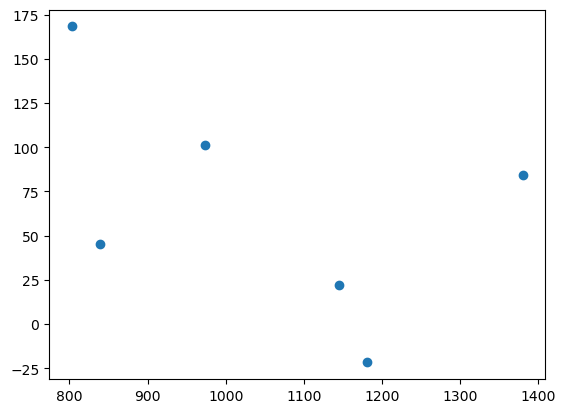

In [40]:
plt.scatter(y_pred,residuals)